# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [574]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import sem
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# displaying markdown strings
from IPython.display import display, Markdown, Latex

# More compact nested loop for ploting
import itertools

import math
from IPython.display import Image

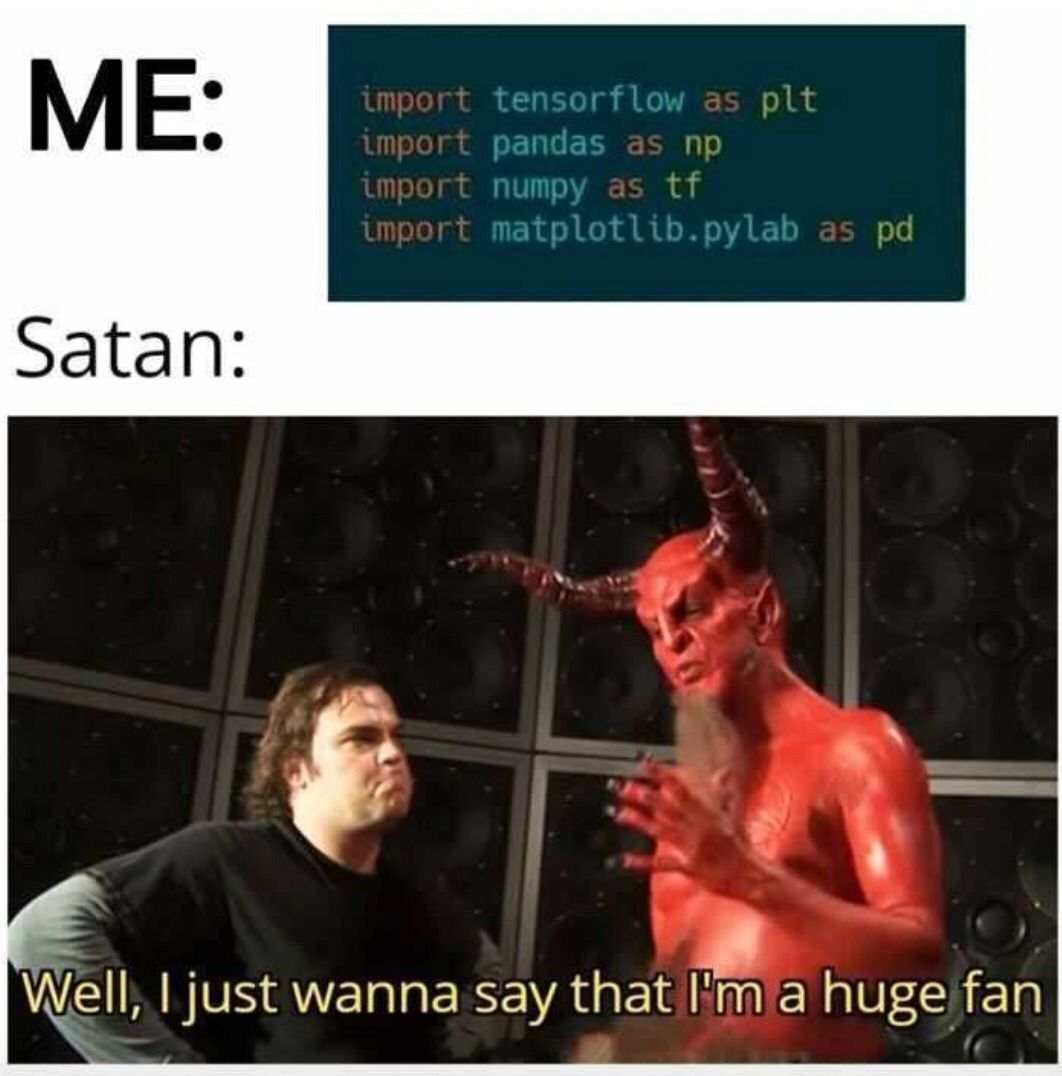

In [575]:
# An ADA smile for you ;)
Image("sadatan.jpeg", width = 450, height = 150)

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

#### Task 1.1: 

In [576]:
DATA_FOLDER = 'data/'

MUSICS_DATASET = DATA_FOLDER+"pitchfork.csv.gz"

In [577]:
musics = pd.read_csv(MUSICS_DATASET, compression = 'gzip', on_bad_lines = 'skip')
musics['reviewdate'] = pd.to_datetime(musics['reviewdate'])

musics.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [578]:
musics = musics.drop_duplicates(subset=['artist', 'album'])
print('The dataframe has',musics.shape[0],'rows')

The dataframe has 16738 rows


#### Task 1.2: 

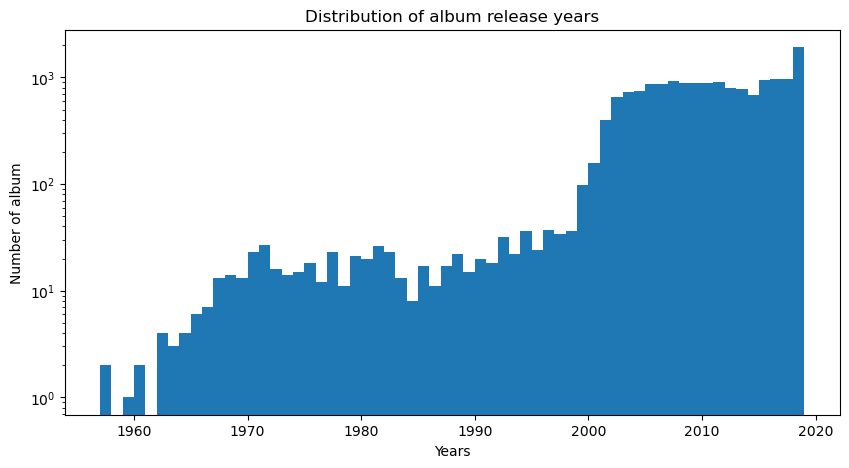

In [579]:
# Bins defined to obtain one bar per year
bins_year = np.arange(min(musics.releaseyear), max(musics.releaseyear) + 1, 1).size-1
ax = musics.releaseyear.hist(bins=bins_year, log=True, grid=False, figsize= (10,5));
ax.set_title('Distribution of album release years');
ax.set_xlabel('Years');
ax.set_ylabel('Number of album');

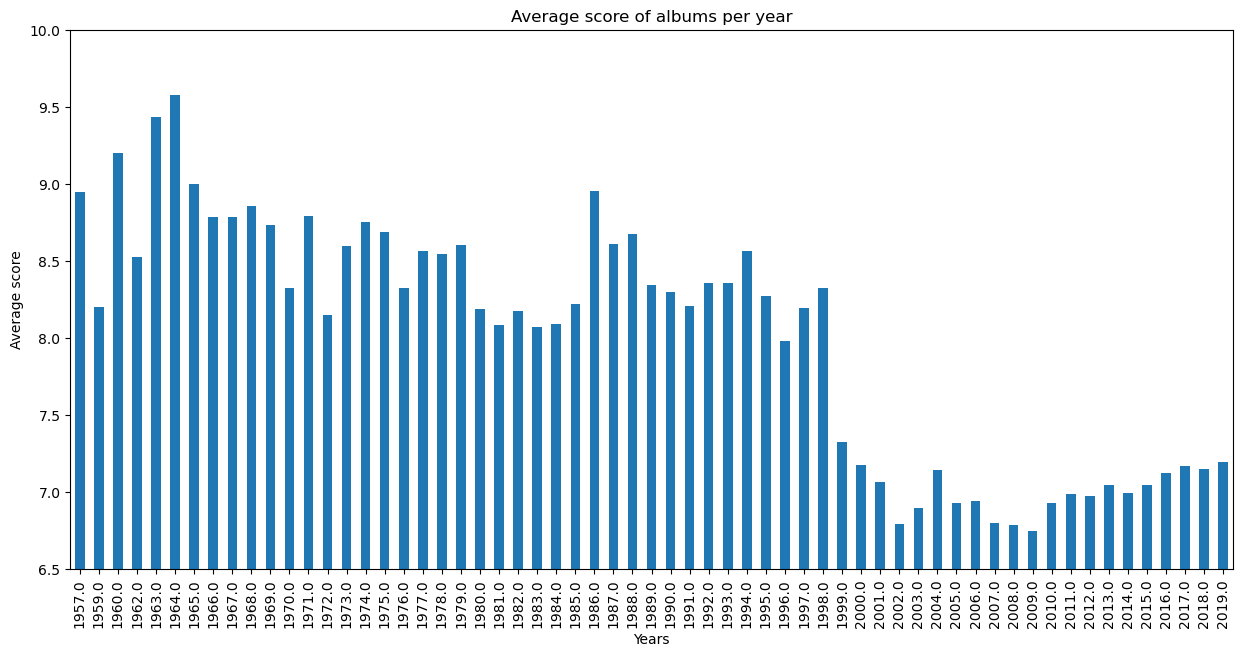

In [580]:
ax = musics.groupby('releaseyear').mean().score.plot(kind='bar', figsize= (15,7));
plt.ylim([6.5, 10])
ax.set_title('Average score of albums per year');
ax.set_xlabel('Years');
ax.set_ylabel('Average score');

#### Task 1.3: 

In [581]:
musics_described = musics.describe(percentiles=[.5]).drop(['count', 'std'])
musics_described

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048596,2009.346338,0.512334,0.601276,5.216501,-9.283268,0.090742,0.301914,0.274748,0.196402,0.405268,120.326487
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,7.300000,2010.000000,0.511348,0.624722,5.230769,-8.444263,0.056665,0.228844,0.149363,0.174261,0.406288,120.397346
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


In [582]:
# We observe negative values for categories that should only contain positive values, so we drop these rows
musics = musics.drop(musics[musics.danceability < 0].index)
musics = musics.drop(musics[musics.energy < 0].index)
musics = musics.drop(musics[musics.speechiness < 0].index)
musics = musics.drop(musics[musics.acousticness < 0].index)
musics = musics.drop(musics[musics.instrumentalness < 0].index)
musics = musics.drop(musics[musics.liveness < 0].index)
musics = musics.drop(musics[musics.valence < 0].index)
musics = musics.drop(musics[musics.tempo < 0].index)
musics.describe(percentiles=[.5]).drop(['count', 'std'])

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048536,2009.345965,0.512967,0.601951,5.219034,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333
50%,7.300000,2010.000000,0.511364,0.624823,5.230769,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


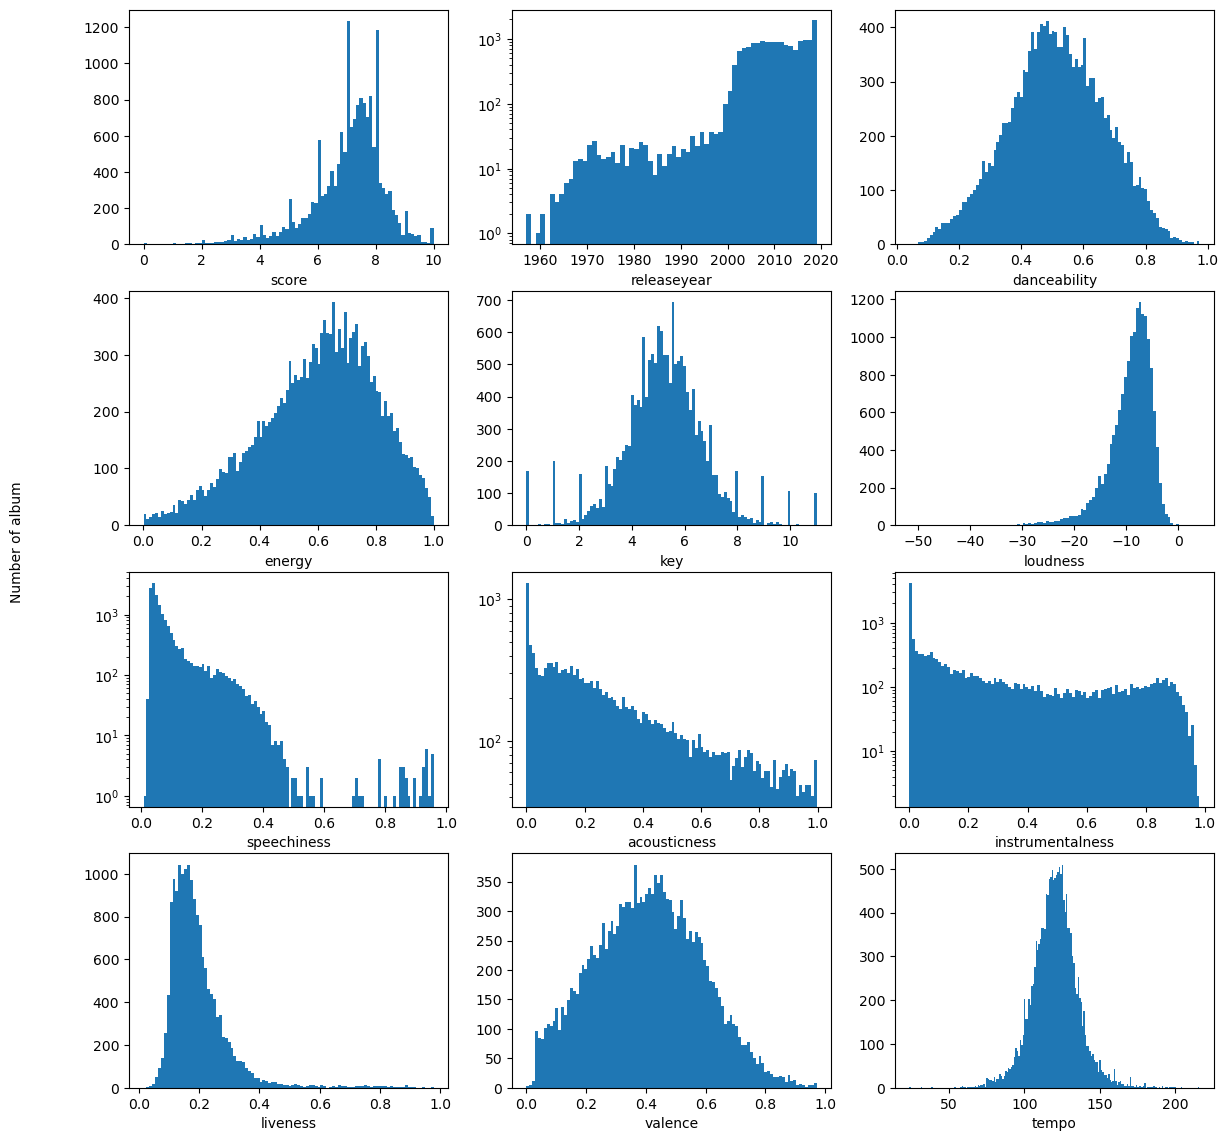

In [583]:
# Two arrays for compact option settings in each histogram.
# Bins for the score is 90 and not 100 because 100 creates disgraceful holes in the histogram
bins_table = [90, bins_year, 100, 100, 100, 100, 100, 100, 100 , 100, 100, 200]
log_table = [False, True, False, False, False, False, True, True, True, False, False, False]

fig, axs = plt.subplots(4, 3 ,figsize=(14,14))
fig.text(0.04, 0.5, 'Number of album', va='center', rotation='vertical')
for i, j in itertools.product(range(4), range(3)):
    musics[musics_described.columns[3*i+j]].hist(bins = bins_table[3*i+j], log=log_table[3*i+j], ax=axs[i,j], grid=False);
    axs[i,j].set_xlabel(musics_described.columns[3*i+j]);

#### Task 1.4: 

In [584]:
musics['genre'] = musics['genre'].replace('none', np.nan).fillna('Other')

for col in musics:
    if musics[col].dtypes == object:
        print(col,':', musics[col].unique().size)
        if musics[col].unique().size<=10:
            print(musics[col].unique())

artist : 7890
album : 16176
reviewauthor : 554
recordlabel : 3030
genre : 10
['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


#### Task 1.5: 


1. As we can see on the histograms, the dataset is unbalanced. For exemple, the features for which we have to use logscale such as release, speechiness and acousticness.

2. The dataset is biased in at least two ways. The frist is that they favor independent musics which is therefore not representative. The second way is that the review the album very early and that a single reviwer is reviewing the album instead of for exemple taking the mean of reviewer panel.

3. Since 2016, they have published retrospective "reviews of classics and other albums that had not previously reviewed" which is a bias compared to a review done at the time of release. So it is not fair with respect to albums reviewed at release time. For exemple, if you review the first Red Hot Chili Peppers album at release time, you are not biased by knowing they are a planetary successful group. Moreover, the sensibility of a reviewer towards certains musical features may evolve throughout time.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

#### Task 2.1:

In [585]:
musics = pd.concat([musics, pd.get_dummies(musics['genre'], prefix='', prefix_sep='').add_suffix('_onehot')], axis=1)
musics

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.511917,0.499667,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425400,0.433474,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019.0,2019-05-24,none,Electronic,0.536750,0.652050,...,1,0,0,0,0,0,0,0,0,0
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019.0,2019-05-24,none,Rap,0.815429,0.556929,...,0,0,0,0,0,0,0,0,1,0
16774,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019.0,2019-05-24,none,Pop/R&B,0.633636,0.374664,...,0,0,0,0,0,0,0,1,0,0
16775,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019.0,2019-05-24,none,Rock,0.440909,0.876636,...,0,0,0,0,0,0,0,0,0,1


#### Task 2.2:

In [586]:
def numpy_helper(df, cols):
    '''
    Return np.array out of your dataframer.
    :param df: dataframe object
    :param cols: list of columns
    :return: np.arrar
    '''
    return df[cols].to_numpy()

#### Task 2.3:

In [587]:
X = numpy_helper(musics, ['Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot'])

Remembering that we have some non unique album names, let's count how many unique rows (taking into account also the one hot encoded features) we have in our set of features (we expect it to be a number between the and the the number of unique albums hence 16176 and the total number of rows which are 16730.) For these tasks this information does not carry much value.

In [588]:
len(musics[['album', 'Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot']].drop_duplicates())

16533

In [589]:
y = numpy_helper(musics, ['score'])

Have to remove the singleton dimension.

In [590]:
y = np.squeeze(y)

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Task 2.4:

In [592]:
class BaselineRegressor():
    '''
    Dummy regressor that always predicts the mean.
    '''
    def __init__(self, *, strategy="mean"):
        self.strategy = strategy

    def fit(self, X, y, sample_weight=None):
        """Fit the random regressor.
        param: X: array-like of shape (n_samples, n_features)
        param: y: array-like of shape (n_samples,) or (n_samples, n_outputs)
        param: sample_weight : array-like of shape (n_samples,), default=None
        return: object (fitted estimator).
        """
        if y.ndim == 1:
            y = np.reshape(y, (-1, 1))
        self.n_outputs_ = y.shape[1]

        if self.strategy == "mean":
            self.constant_ = np.average(y, axis=0, weights=sample_weight)

    def predict(self, X):
        """Perform classification on test vectors X.
        param: X: array-like of shape (n_samples, n_features)
        return: array-like of shape (n_samples,) or (n_samples, n_outputs)
        """
        n_samples = len(X)

        y = np.full(
            (n_samples, self.n_outputs_),
            self.constant_,
            dtype=np.array(self.constant_).dtype,
        )

        if self.n_outputs_ == 1:
            y = np.ravel(y)

        return y

In [593]:
dummy_regr = BaselineRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

#### Task 2.5:

In [594]:
print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred)))

The R2 score on the test set is -0.000011


The preduction is so poor that we get a negative R2 score.

#### Task 2.6:

The train/test split was not stratified in relation to the realease year or some other very relevant features (for example more a big difference in the average score of the albums between the two sets), hence there might be an unbalanced number of samples from different years (or other features which have a high weight in the pattern prediction) in the train and test sets.

For example if we have more samples in the training set with an older realease year the model (even if quite dummy in this case) might learn a correlation between certain features and the score which is more relevant for older albums than newer ones. Tastes or the reviewer's reactions to certain aspects of the albums might be significantly diiferent between very old and very recent songs.
All of this might impair the task of predicitng whether a future album will be successful or not.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

#### Task 3.1:

In [595]:
X2 = numpy_helper(musics, ['releaseyear', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot'])
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=123)

In [596]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred))) #same as lin_reg.score(X_test, y_test)

The R2 score on the test set is 0.038670


#### Task 3.2:

In [597]:
X_before_2000 = musics.query('releaseyear < 2000')

In [598]:
X_after_2003 = musics.query('releaseyear > 2002')

In [599]:
y_before = numpy_helper(X_before_2000, ['score'])
y_after = numpy_helper(X_after_2003, ['score'])

In [600]:
y_train = np.squeeze(y_before)
y_test = np.squeeze(y_after)
X_train = numpy_helper(X_before_2000, ['releaseyear', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot'])
X_test = numpy_helper(X_after_2003, ['releaseyear', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot'])

In [601]:
lin_reg2 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg2.predict(X_test)

print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred)))

The R2 score on the test set is -0.282252


We get a negative R2 score which tells us that we have a very poor prediction. It can be expected to have a significantly lower r2 score for the longitudinal split given that the train/test split ratio is severely altered 5/95 (normally we wanna as in the previous question a 70/30 or 80/20 train test split ratios) having many more test than train samples! On top of that as we are training on albums released before the 2000 but testing on data after 2003 the model might be learning some patterns related to the score which were valid for the particular albums pre 2000 but not for the ones after 2002. revewers tastes and reaction to the same characteristics of a particular song may be changing during the years.
Even if wanted to follow a more adequate train/test split ration, given that we have so few samples in the train set to begin with migth still create problems.

#### Task: 3.3:

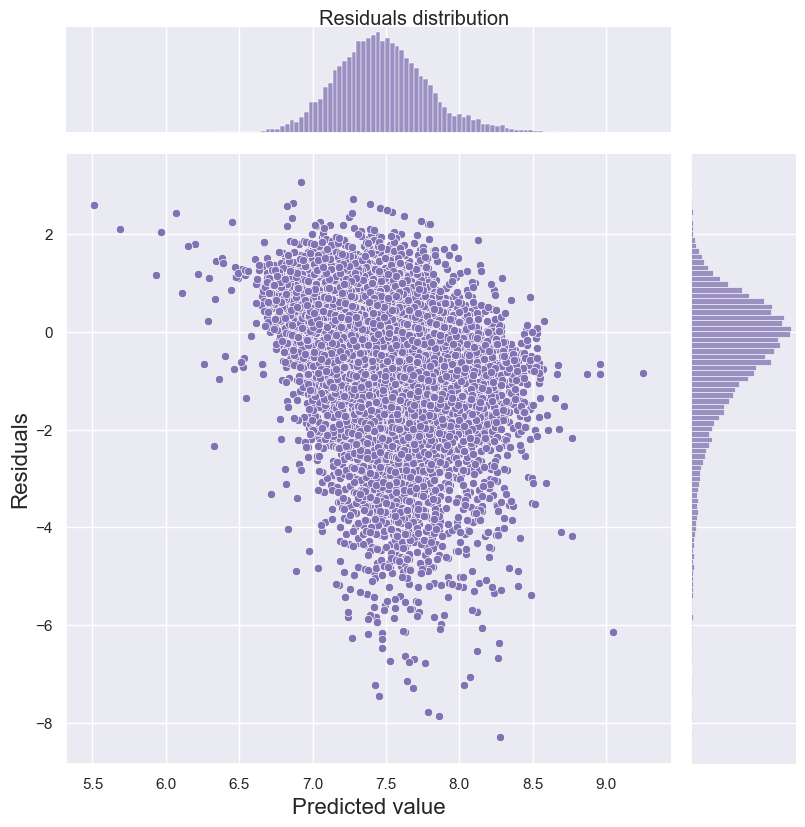

In [602]:
residuals = y_test - y_pred
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=y_pred, y=residuals, data=None,
                  kind="scatter",
                  color="m", height=8); #or kind scatter without the reg line
plt.suptitle('Residuals distribution', y = 1);                  
g.set_axis_labels('Predicted value', 'Residuals', fontsize=16);

Calculate probability that preidiction is off by more than two points calculating between the total number of residuals how many are higher than +2 and lower than -2

In [603]:
probability = np.sum((residuals < -2) | (residuals > 2))/ residuals.size

In [604]:
print("The computed probability is %f" % probability)

The computed probability is 0.109265


As we observe in the distribution in the joinplot, most of residuals sit in the -2 to 2 interval.
Now we compute the bootstrap confidence intervals.

In [605]:
def compute_prob(data):
  '''
  Compute the probability that prediction off by more than two points.
  :param data: array
  :return float 
  '''
  return np.sum((data < -2) | (data > 2))/ data.size

In [606]:
data = (residuals,)
res = bootstrap(data, compute_prob, vectorized=False, confidence_level=0.95)
print(res.confidence_interval)

ConfidenceInterval(low=0.10424579489962019, high=0.11428377645143788)


#### Task: 3.4:

In [607]:
grad_boost = GradientBoostingRegressor(random_state=123).fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)
print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred)))

The R2 score on the test set is -0.376154


#### Task: 3.5:

We expected that the gradient boosting would yield better results than linear regression. However, the R2 score is actualy worse. We hypothesize that is because we use default hyperparameters for the gradient boosting and we don't tune them with cross-validation.

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

#### Task 4.1:

In [401]:
musics_latest_album = musics.sort_values(by=['releaseyear', 'reviewdate'], ascending=False).drop_duplicates('artist')
musics_artist_sorted = musics.sort_values(by=['artist'], ascending=False)
musics_previous = musics_artist_sorted[musics_artist_sorted.artist.duplicated() | musics_artist_sorted.artist.groupby(musics_artist_sorted.artist).transform('count').eq(1)]
musics_previous = musics_previous.groupby('artist', as_index=False).mean()
musics_previous.columns=musics_previous.columns.map(lambda x : x+'_previous' if x !='artist' else x)
artist_features = musics_latest_album.merge(musics_previous, left_on='artist', right_on='artist')

In [402]:
print('The dataframe has',artist_features.shape[0],'rows')
print(artist_features.columns)

The dataframe has 7890 rows
Index(['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot',
       'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot',
       'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot',
       'score_previous', 'releaseyear_previous', 'danceability_previous',
       'energy_previous', 'key_previous', 'loudness_previous',
       'speechiness_previous', 'acousticness_previous',
       'instrumentalness_previous', 'liveness_previous', 'valence_previous',
       'tempo_previous', 'Electronic_onehot_previous',
       'Experimental_onehot_previous', 'Folk/Country_onehot_previous',
       'Global_onehot_previous', 'Jazz_onehot_previous',
       'Metal_onehot_previous', 'Other_onehot_previous',
       'Pop/R&B_o

#### Task 4.2:

In [464]:
X = numpy_helper(artist_features,artist_features.columns.drop(['artist', 'album', 'reviewauthor', 'score', 'reviewdate', 'recordlabel', 'genre']))
y = np.squeeze(numpy_helper(artist_features, ['score']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
grad_boost = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)
print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred)))

The R2 score on the test set is 0.779023


#### Task 4.3:

In [465]:
def cross_validate_hyper_parameters(X, y, N, param_grid):
        """Fit the random regressor.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data.
        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            Target values.    
        N : int number of fold
        param_grid : dict-like
              Hyperparameters to test

        Returns
        -------
        senarios : DataFrame
            Parameters and score for each scenario.
        """
        grad_boost = GradientBoostingRegressor()
        grid_search = GridSearchCV(estimator = grad_boost, param_grid = param_grid, cv = N, scoring='r2', n_jobs = -1)
        grid_search.fit(X, y)
        
        scenarios = pd.DataFrame(grid_search.cv_results_)
        datas = scenarios[[col for col in scenarios.columns if 'split' in col]]
        scenarios = scenarios[['param_learning_rate', 'param_n_estimators', 'mean_test_score', 'rank_test_score']]
        confidence = t.interval(alpha=0.90, df=N-1, loc=np.mean(datas, axis=1), scale=sem(datas, axis=1))
        scenarios['90%CI-'] = confidence[0]
        scenarios['90%CI+'] = confidence[1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
        grad_boost = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate']).fit(X_train, y_train)
        y_pred = grad_boost.predict(X_test)
        print("The R2 score on the test set is %f" % (r2_score(y_test, y_pred)))
        return scenarios

As the number of sample is small (number of split), we choose the student t statistique to compute the confidence interval.

In [466]:
param_grid ={'n_estimators' : [100,200,300,400],
             'learning_rate': [0.1,0.05,0.01],}

scenarios = cross_validate_hyper_parameters(X, y, 20, param_grid)
scenarios

The R2 score on the test set is 0.780191


,param_learning_rate,param_n_estimators,mean_test_score,rank_test_score,90%CI-,90%CI+
0,0.1,100,0.716657,5,0.680965,0.752349
1,0.1,200,0.711356,7,0.676149,0.746563
2,0.1,300,0.706604,10,0.670532,0.742676
3,0.1,400,0.707343,9,0.672306,0.742381
4,0.05,100,0.718031,4,0.681023,0.755039
5,0.05,200,0.720426,1,0.683267,0.757585
6,0.05,300,0.719051,2,0.682012,0.756090
7,0.05,400,0.718680,3,0.682095,0.755264
8,0.01,100,0.601449,12,0.573204,0.629694
9,0.01,200,0.692611,11,0.656956,0.728265


#### Task 4.4:

We observe significatively better results (on the R2 score) here than for task 3.4.
However it is not fair to compare these results at face value, for two reasons. 
Firstly because we use "non equivalent" (in the sense of not being both a feasible train/test split strategy) train/test splits given that in the first case we use a longitudinal split (which arguably creates very umbalanced train and test datasets) while in the second one we use a k-fold cross validation strategy. 
Secondly in the first scenario we used the default hyperparameters while in the second one we tuned the hyperparameters and trained the model with the best hyperparameters combinations. Again this might make a comparison very hard to carry out.
Finaly, for task 4.3 we use way more and some different features. Indeed, we compare a training on features at the album level with a training on features at the artist level. Moreover, these artist level features include averages on several rows (_previous columns) which is definitely not the case for the album level features.

For a more fair comparison we would fisrt use a more comparable train/test split strategy. Secondly, we would eihter keep default hyperparameters for both or finetune both.


## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

##### Task 5.1 - filtering data, to keep only albums from artists who have multiple albums: 

In [525]:
# Keep only rows where the artists appears multiple times in the dataframe.
# We keep the duplicates, and strip out the rest. 
musics_mult_albs = musics[musics.duplicated(subset='artist', keep=False)]

# Removes rows for which the releasedate is empty (there are none)
musics_mult_albs = musics_mult_albs[musics_mult_albs['releaseyear'].notnull()]

musics_mult_albs.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,0,1,0
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,2008-08-27,Vagrant,Electronic,0.624846,0.438154,...,1,0,0,0,0,0,0,0,0,0
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,2008-11-11,Polymer,Rock,0.447583,0.399083,...,0,0,0,0,0,0,0,0,0,1


#### Task 5.2

In [526]:
# Sort the data first by consecutive artist, and then by release year (i.e. entries from same artist are
# listed in chronological order), finally, we include reviewdate for the case of multiple albums in the same year:
sorted_df = musics_mult_albs.sort_values(by=['artist','releaseyear', 'reviewdate'])
grouped_df = sorted_df.groupby(['artist'])

# Define dynamic lists to fill pregressively with each artist group:
artist = []
album = []
prec_albums = []

# For each artist group, album is filled with all albums from this artist (still in chronological
# order, and prec_albums is filled with a list ranging from 0 to num_albums_from_this_artist - 1
# and refers to preceeding albums to the one in question):
for group in grouped_df:
    artist = artist + list(group[1]['artist'])
    album = album + list(group[1]['album'])
    prec_albums = prec_albums + list(range(0, group[1]['album'].count()))

# Define and fill DataFrame, after all the iterations are done (this avoids using a computationally heavy 
# dynamic DataFrame):
temp_df = pd.DataFrame({'artist' :artist, 'album': album, 'prec_albums': prec_albums})

# Merge the two DataFrame such as to simply add the preceeding_albums column to the original DataFrame:
musics_mult_albs_prec = musics_mult_albs.merge(temp_df, how='left', on=['artist','album'])

musics_mult_albs_prec.head(10)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot,prec_albums
0,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,1,0,0,0,0,0,0,0,2
1,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,0,0,0,0,0,0,0,0,0,0
2,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,1,0,4
3,French Kicks,Swimming,Roque Strew,7.6,2008.0,2008-08-27,Vagrant,Electronic,0.624846,0.438154,...,0,0,0,0,0,0,0,0,0,3
4,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,2008-11-11,Polymer,Rock,0.447583,0.399083,...,0,0,0,0,0,0,0,0,1,0
5,The Essex Green,Essex Green EP,Matt LeMay,8.1,2000.0,2000-05-31,Parasol,Rock,0.729000,0.932000,...,0,0,0,0,0,0,0,0,1,0
6,Wolf Parade,EP 4,Ian Cohen,7.0,2016.0,2016-05-26,Wolf Parade Productions,Rock,0.611000,0.624800,...,0,0,0,0,0,0,0,0,1,4
7,American Football,American Football,Ian Cohen,8.6,1999.0,2014-05-21,Polyvinyl,Rock,0.482778,0.681889,...,0,0,0,0,0,0,0,0,1,0
8,FIDLAR,FIDLAR,Brandon Stosuy,7.0,2013.0,2013-01-25,Mom & Pop,Rock,0.361714,0.874429,...,0,0,0,0,0,0,0,0,1,0
9,The Soft Pink Truth,Do You Want New Wave or Do You Want the Soft P...,Cameron Macdonald,8.5,2004.0,2004-11-03,Tigerbeat6,Electronic,0.788400,0.530500,...,0,0,0,0,0,0,0,0,0,1


Note: We are aware that taking the reviewdate to order the albums if they are from the same year may be wrong in some cases. However, we think that in most cases of multiple album in the same year, the reviews were done in the order of release and therefore this should at least reduce the ordering errors.

#### Task 5.3

In [527]:
# All statistics for the first album: 
first_stats = musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==0].score.describe()
pd.DataFrame(first_stats)

,score
count,3561.000000
mean,7.303229
std,1.235374
min,0.000000
25%,6.800000
50%,7.500000
75%,8.000000
max,10.000000


In [528]:
# All statistics for the second album: 
second_stats = musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==1].score.describe()
pd.DataFrame(second_stats)

,score
count,3561.000000
mean,7.038978
std,1.273217
min,0.000000
25%,6.500000
50%,7.300000
75%,7.800000
max,10.000000


In [529]:
# Mean and standard error calculations :

# The standard error of a statistic is the standard deviation of the sample divided by the square root of the sample
# size :
stan_err_first = first_stats[2] / math.sqrt(first_stats[0])
stan_err_second = second_stats[2] / math.sqrt(second_stats[0])

# Print out means
print('The mean of the scores of the first and second album are: %.3f and %.3f respectively (rounded to 3 dp).'
      % (first_stats[1], second_stats[1]))

# Print out standard errors
print('The standard error of the means of the first and second albums are: %.3f and %.3f respectively (rounded to 3 dp).'
      % (stan_err_first, stan_err_second))

The mean of the scores of the first and second album are: 7.303 and 7.039 respectively (rounded to 3 dp).
The standard error of the means of the first and second albums are: 0.021 and 0.021 respectively (rounded to 3 dp).


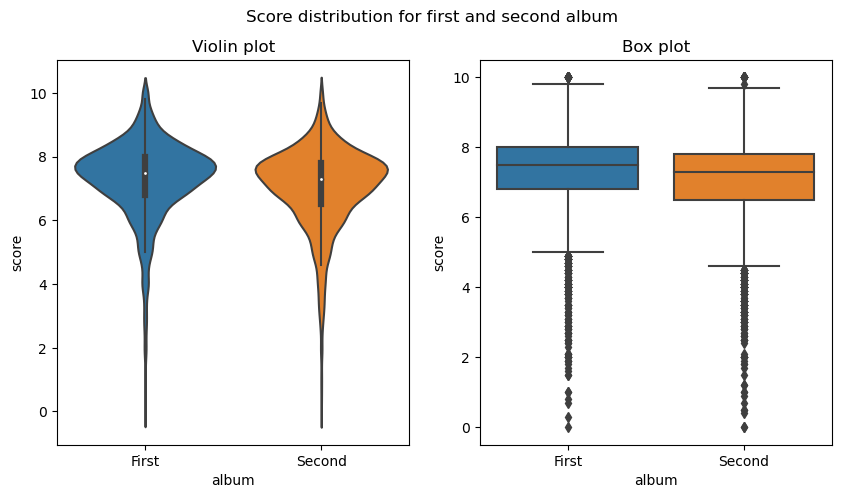

In [530]:
# We now plot the distributions with 2 useful plots - boxplot and violin plot to have a good idea of the distribution
# of the values for the 2 first albums: 

first_album = pd.DataFrame(musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==0].score).assign(album='First')
second_album = pd.DataFrame(musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==1].score).assign(album='Second')
data=pd.concat([first_album,second_album])

fig, axs = plt.subplots(1, 2 ,figsize=(10,5))
fig.suptitle('Score distribution for first and second album')

sns.violinplot(ax=axs[0], x='album', y='score', data=data)
axs[0].set_title('Violin plot');

sns.boxplot(ax=axs[1], x='album', y='score', data=data)
axs[1].set_title('Box plot');

#### Task 5.4

In [531]:
# Which is most appropriate? one or two tailed test?

ttest_ind(first_album.score,second_album.score)

Ttest_indResult(statistic=8.888721906459027, pvalue=7.726379958315815e-19)

Since the assumptions for the Student t-test are satisfied, we compute it and obtain a p-value that is much smaller than 0.05, so we reject the null hypothesis and conclude that there is a statistically significant difference between the mean score of the first and second albums. Note that we used a 2-sided test, since this allows us to search for a difference in mean in any direction. In this case, we found a significant difference, and we can deduce that it is a decrease in mean score with the help of task 5.3.

#### Task 5.5

Given the result of the t-test computed above, we can conclude that the "second album syndrome" exists as there is a statistically significant difference between the first album and the second album. 

If we look at the plots of task 5.3, we can see this difference in mean score between the 2 albums (approximately a 0.3 score drop), and this decrease in mean score is also visible in the "describe" functions of task 5.3. 

We can also look at the general statistics of the first and second albums (from the describe function) and notice that there is also a drop in the median score value, however it is smaller (0.2 score drop) than the mean drop, which indicates that perhaps a small number of bands are prone to a severe drop in quality (i.e. extreme values) but that most bands suffer a smaller drop in album quality between first and second. 

We can also note a fairly high level of confidence in this analysis as we have a low standard error for both first and second album (low score standard deviation and high sample size). 

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


#### Task 6.1

In [532]:
#Create a Series of unique artist with multiple albums
artists=pd.Series(musics_mult_albs_prec.artist.unique())

#We create the empty list for our new columns
score_diff=[]
time_diff=[]
did_style_change=[]

#We defined here the list of columns to use for euclidian distance calculation for more readability
column_list=['artist','album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate', 'recordlabel', 'genre', 'prec_albums']

#Compute the vector of standard deviation needed for seuclidean
V=musics_mult_albs_prec.drop(columns=column_list).std()

#We iterate over all artists to compute the values
for artist in artists:
    #Find the score of the first and second album and fill the list with the difference
    score_first=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==0)].score
    score_second=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==1)].score
    score_diff=score_diff+ list(score_second.values-score_first.values)
    
    #Find the release year of the first and second album, substract and multiply by 365 to get the number of days
    time_first=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==0)].releaseyear
    time_second=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==1)].releaseyear
    time_diff=time_diff+list((time_second.values-time_first.values)*365)
    
    #Compute the euclidian distance between second and first album
    u=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==0)].drop(columns=column_list)
    v=musics_mult_albs_prec.loc[(musics_mult_albs_prec['artist']==artist) & (musics_mult_albs_prec['prec_albums']==1)].drop(columns=column_list)
    did_style_change.append(seuclidean(u,v,V))
    
#We need to convert did_style_change to a pandas Series to use the function nlargest
did_style_change=pd.Series(did_style_change)
mini=did_style_change.nlargest(n=int(0.2*len(did_style_change))).min()#defines the minimum value to be in the 20% largest value
did_style_change=did_style_change.where(did_style_change>=mini, 0)#assigns 0 when condition not met
did_style_change=did_style_change.mask(did_style_change>=mini, 1)#assigns 1 when condition is met
pairs=pd.DataFrame({ 'score_diff': score_diff, 'time_diff' : time_diff, 'did_style_change' : did_style_change})
pairs.head(10)


,score_diff,time_diff,did_style_change
0,-1.1,10220.0,0.0
1,-0.5,365.0,0.0
2,6.0,730.0,0.0
3,-0.7,730.0,0.0
4,-0.5,1095.0,1.0
5,-1.9,1095.0,0.0
6,2.1,0.0,0.0
7,-0.5,7300.0,0.0
8,-1.2,730.0,0.0
9,0.1,365.0,0.0


#### Task 6.2

In [533]:
#First we declare the model
mod=smf.ols('score_diff ~ 1', data=pairs)

#Then we fit the model, and declare a random seed for consistency
np.random.seed(2)
res = mod.fit()

#Finally we print the summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        14:31:28   Log-Likelihood:                -6195.2
No. Observations:                3561   AIC:                         1.239e+04
Df Residuals:                    3560   BIC:                         1.240e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2643      0.023    -11.440      0.0

#### Task 6.3

An $R^2$ of 0 means that this model does not grasp at all the variation of the dataset. Indeed in this case, the "unexplained variance" is equal to the total variance, which means our model with only an intercept does not explain at all the variance of the dataset. This analysis confirms what we found in the task 5, because the difference in score cannot be explained at all without more covariates in the model. So the difference in means has to be due to something else than simple variations in the score.

#### Task 6.4

In [534]:
# With interaction between the two supplementary parameters: 
#First we declare the new model
mod2=smf.ols('score_diff ~ time_diff *did_style_change', data=pairs)

#Then we fit the new model
res2 = mod2.fit()

#Finally we print the summary
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     21.07
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.59e-13
Time:                        14:31:58   Log-Likelihood:                -6163.8
No. Observations:                3561   AIC:                         1.234e+04
Df Residuals:                    3557   BIC:                         1.236e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [535]:
# Without interaction between the two supplementary parameters
#First we declare the new model
mod2=smf.ols('score_diff ~ time_diff + did_style_change', data=pairs)

#Then we fit the new model
res2 = mod2.fit()

#Finally we print the summary
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.06
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.26e-14
Time:                        14:32:15   Log-Likelihood:                -6164.4
No. Observations:                3561   AIC:                         1.233e+04
Df Residuals:                    3558   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1453      0.030  

#### Task 6.5

The time_diff appears to be statistically significant (P value close to 0) and to negatively impact the score_diff, the longer time between 2 albums, the bigger the difference (negatively). However, due to the scale of the time_diff (multiple of 365 due to the releaseyear parameter only including the year), the coefficients is extremely small. We can calculate that a difference of 1 year(365 days) will produce a score difference of $-9,47*10 ^{-5}*365=-0.035$. This contradicts the first hypothesis that an album made in a rush is is worse, the data seems to indicate that the longer time between 2 albums, the bigger the difference in score. However, the difference in scale between time_diff (with huge numbers) and did_style_change(0 or 1) might affect the model.

Regarding the did_style_change covariates, we first observe that it is not statistically significant (large P-value), but the coefficient is quite big: if there is a change of style (as defined in task 5), the score of the second album will decrease by 0.05 points (or 0.01 in the model without interactions) with respect to the 1st album, which is consequent. This indicates that the second hypothesis might be correct, a change of style is not always welcomed.

The linear regression was done two ways, first considering the interaction between parameters time_diff and did_style_change, and then without. The main thing to note is that the result is very similar. 

The $R^2$ value of the linear regression is 0.017. This value is very small, which suggests that there is little to no linear correlation between the score and the parameters taken into account. For this reason, we must take the conclusions from this analysis with a grain of salt, as the result of our linear regression is quite inconclusive. 

This might be explained by the fact that we are trying to fit a linear regression to a parameter time_diff which varies as multiple of 365 days. Any two albums released within a one year timeframe simply admit time_diff=0, then for two albums released within a year, time_diff=365, and so on ... 
This will generate clusters of datapoints at 0, 365, 730, ... days and will be difficult to fit to a linear model. 

The low $R^2$ value and the high p-value for the did_style_change covariate, indicate that our data is not fully explained by the covariates we have studied so far. It is therefore possible that there exist other covariates that might better explain the second album syndrome. 

#### Task 6.6

In [536]:
# Standardization of the time_diff column: 
mean=pairs.time_diff.mean()
std_dev=pairs.time_diff.std()
pairs['time_diff_standardized']=(pairs.time_diff-mean)/std_dev

In [537]:
#First we declare the new model
mod3=smf.ols('score_diff ~ time_diff_standardized *did_style_change', data=pairs)

#Then we fit the new model
res3 = mod3.fit()

#Finally we print the summary
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     21.07
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.59e-13
Time:                        14:32:17   Log-Likelihood:                -6163.8
No. Observations:                3561   AIC:                         1.234e+04
Df Residuals:                    3557   BIC:                         1.236e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### Task 6.7

Standardization will adjust the values of time_diff such that they fit a normal distribution with a mean of zero and a standard deviation of one. This means the data will be shifted and squeezed. The spread of the time_diff data is small, so we expect the norm of the gradient of a linear relation to increase. We observe in the new linear regression that the coefficient of the time_diff predictor is more negative (it shifts from $-9.47 \times 10^{-5}$ for the non-standardized regression to $-0.193$ for the standardized one.

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


#### Task 7.1

We would expect the mean score of the third album to be similar to the score of the first album, or at least higher compared to the 2nd album. That is if the Second Album Syndrome exists, and only affects the 2nd album, not the others.

#### Task 7.2

In [538]:
# Compute stats first, second, third, and fourth album scores
first=musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==0].score.describe()
second=musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==1].score.describe()
third=musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==2].score.describe()
fourth=musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==3].score.describe()

# We create a new DataFrame for nice display
total=pd.DataFrame({'First':first, 'Second':second, 'Third':third, 'Fourth':fourth})
total

,First,Second,Third,Fourth
count,3561.000000,3561.000000,1949.000000,1178.000000
mean,7.303229,7.038978,7.044125,7.040662
std,1.235374,1.273217,1.219782,1.239811
min,0.000000,0.000000,0.400000,1.200000
25%,6.800000,6.500000,6.500000,6.500000
50%,7.500000,7.300000,7.200000,7.250000
75%,8.000000,7.800000,7.800000,7.800000
max,10.000000,10.000000,10.000000,10.000000


In [539]:
# Mean and standard error calculations :

stan_err_all = []
for i in range(4):
    stan_err_all.append(musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==i].score.sem())

raw_data = [list(total.iloc[1]), stan_err_all]
mean_and_stan_err = pd.DataFrame(raw_data,
                  index=pd.Index(['mean', 'standard_error']),
                  columns=pd.Index(['First', 'Second', 'Third', 'Fourth']))

mean_and_stan_err

,First,Second,Third,Fourth
mean,7.303229,7.038978,7.044125,7.040662
standard_error,0.020702,0.021336,0.027630,0.036123


In [540]:
# t-test to see if difference between the average score of the second and the third album is statistically significant
ttest_ind(musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==1].score,
          musics_mult_albs_prec[musics_mult_albs_prec.prec_albums==2].score)

Ttest_indResult(statistic=-0.14561434695361808, pvalue=0.8842311697757008)

Once again, we assume that the assumptions for the Student t-test are satisfied, so we compute it and obtain a p-value that is this much much bigger than 0.05. Therefore we cannot reject the null hypothesis that the 2 means are equals.

#### Task 7.3

We observe that there is no statistically significant difference between the seconnd and third album, since the p-value is high (0.884>>0.05). This suggests that the Second Album Syndrome does in fact not exists. Based on task 7.2, we can infer that the only album with a different mean is in fact the first, which is higher than for other albums, although this hypothesis should be further tested.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

#### Part 1: Generate the hypothetical model

In [541]:
#random generator
rng = np.random.default_rng()

# Generate 1000 talents
band_talents = (8-2)*rng.random(1000)+2


# Format data for pd.DataFrame and generate album qualities 
data = {'index':range(1,1001), 'talent':band_talents, 
        'album_quality': np.random.normal(loc=band_talents, scale=1.0, size=None)}

# Generate dataframe
hyp_bands = pd.DataFrame(data)

# Eliminate bands with quality scores inferior to 6
hyp_bands = hyp_bands[hyp_bands['album_quality'] >= 6]

# Create two additional albums
hyp_bands['second_album'] = np.random.normal(loc=hyp_bands['talent'], scale=1.0, size=None)
hyp_bands['third_album'] = np.random.normal(loc=hyp_bands['talent'], scale=1.0, size=None)

hyp_bands.head()

,index,talent,album_quality,second_album,third_album
4,5,7.902735,6.109300,8.100485,9.437091
6,7,6.367840,6.870721,6.704676,5.352147
8,9,7.157006,6.099054,6.559349,5.930403
11,12,6.964962,9.257170,7.302899,7.321264
16,17,7.121954,7.102823,6.391926,7.963568


#### Part 2: Analzing simulation and explaining results of part 7.2

The simulation uniformly and independently assigns a talent to each band. 
The quality of the first album is normaly distributed, and we only keep bands which generate quite a high album quality (greater than 6). 
As each album quality has the same standard deviation (sigma is 1) and the normal distribution is symmetric around its' mean (i.e. it is unskewed), the album quality will depend strictly on the talent of the band. In general, we expect that a band with higher talent, will produce an album of higher quality (and vice-versa). 
The second and third albums are generated the same way as the first one. All three albums for a given band would have similar quality scores, as they are generated using the same talent (mean). Differences between album qualities for a given band can be explained by the variance of the normal distribution. 


### Need to explain results of part 7.2

In [542]:
# Compute stats first, second, third, and fourth album scores
first_hyp=hyp_bands.album_quality.describe()
second_hyp=hyp_bands.second_album.describe()
third_hyp=hyp_bands.third_album.describe()
# We create a new DataFrame for nice display
total_hyp=pd.DataFrame({'First':first_hyp, 'Second':second_hyp, 'Third':third_hyp})
total_hyp

,First,Second,Third
count,316.000000,316.000000,316.000000
mean,7.202656,6.749654,6.634609
std,0.854602,1.321869,1.284725
min,6.002512,1.465065,2.564449
25%,6.497546,6.011063,5.750940
50%,7.143411,6.768513,6.618091
75%,7.715689,7.548311,7.510059
max,10.158545,10.650900,9.997059


We observe once again that the mean score of the first album is higher than for the second and third albums. However, we note that the standard deviation is a lot smaller in the first album compared to second and third album. We think that this is due to the selection of bands that can produce a second and third album. Since only the bands with a first album quality higher than 6 are able to produce more albums, it corresponds to "cutting" the gaussian distribution and only keeping the right part of the spectrum, which creates a skewed distribution. Since the talent is constant in our simulation, the bands that were "lucky" in the 1st gaussian and produced an album_quality higher than 6 even though their talent is lower, will produce second and third albums that are lower in quality. 
Therefore, this explains also the results in task 7.2. Since only the bands that performed well are able to do multiple albums, the gaussian is skewed by this selection, hence the lower results for the subsequent albums.